In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-07-06 09:19.
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-07-06 09:20.


In [2]:

In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [4]:
adata =sc.read_h5ad(out_path+'/human_subset_remove_PBMC.h5ad')

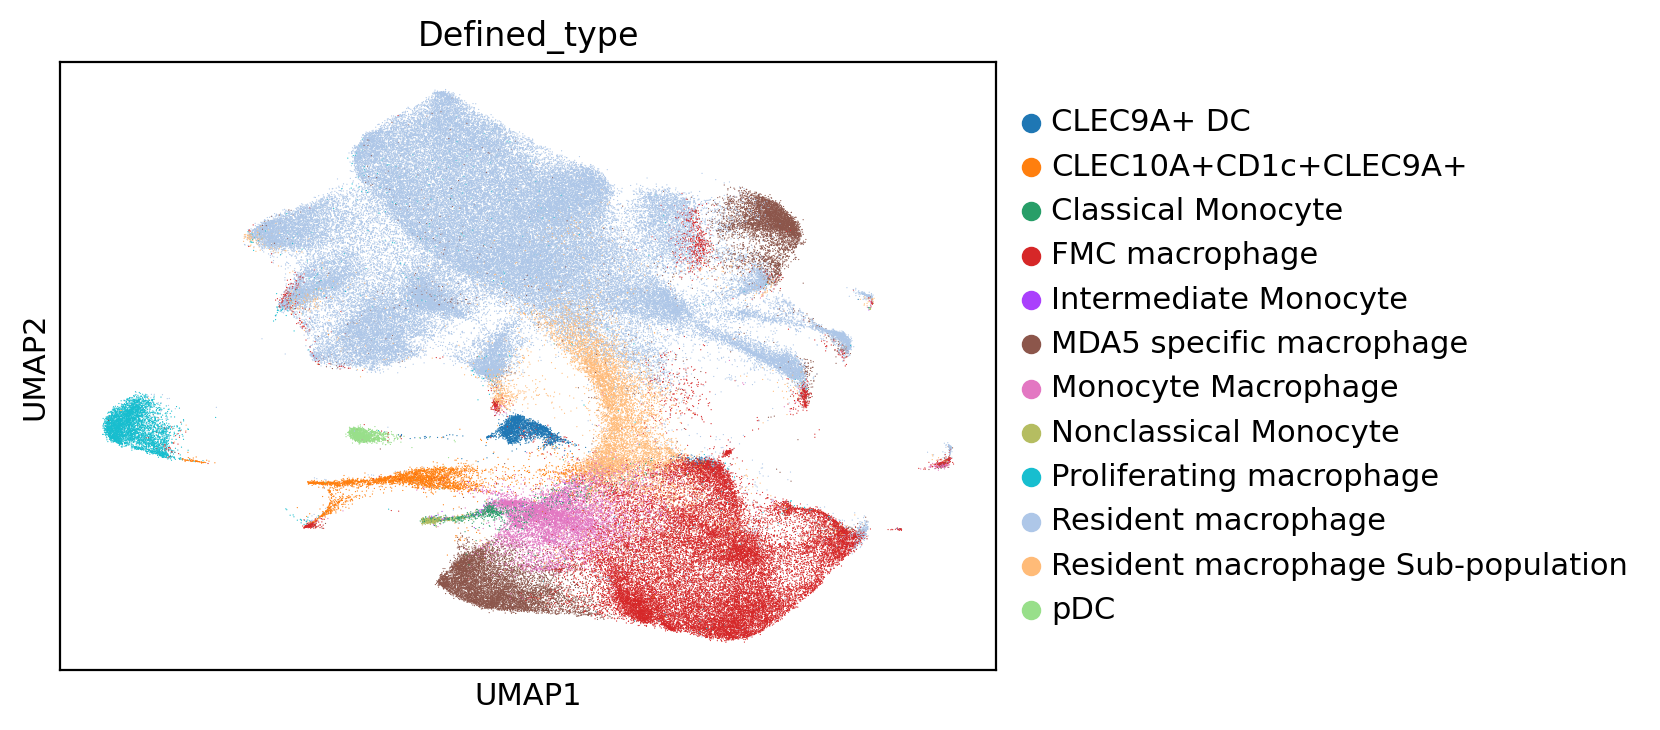

In [5]:
sc.pl.umap(adata, color = 'Defined_type')

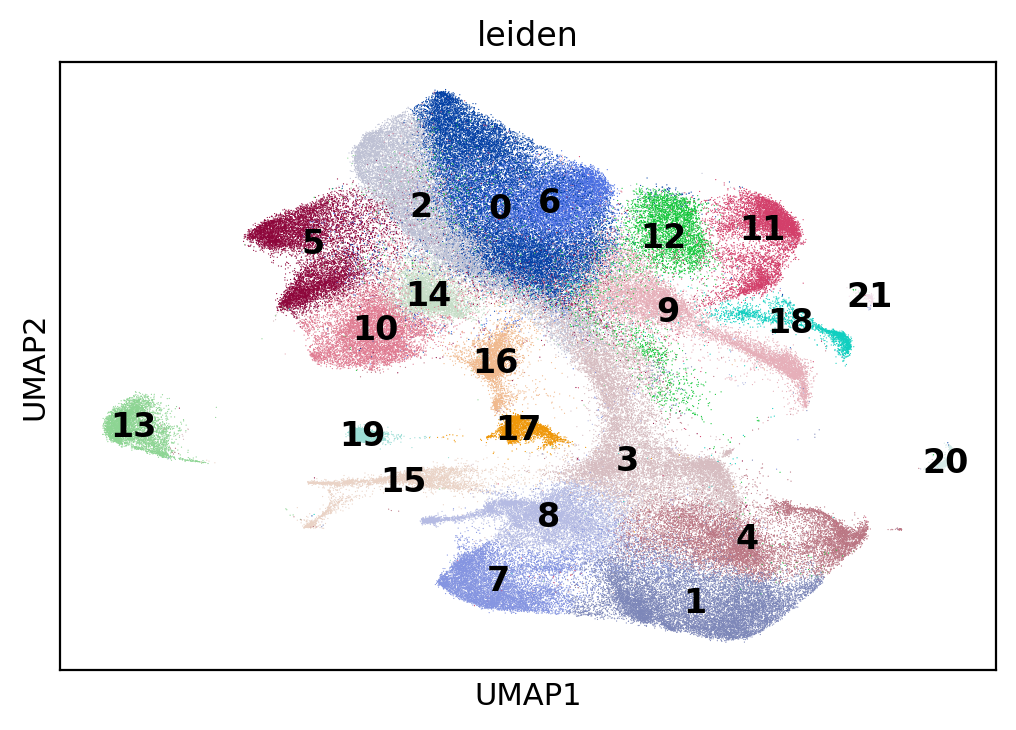

In [6]:
sc.pl.umap(adata,color='leiden',legend_loc = 'on data')

In [7]:
import cellrank as cr
scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [8]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [9]:
cr.tl.terminal_states(adata, cluster_key='Defined_type', weight_connectivities=0.2,n_jobs=4,n_states=6)


Accessing `adata.obsp['T_fwd']`


<ipython-input-9-aac1892afd84>:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(adata, cluster_key='Defined_type', weight_connectivities=0.2,n_jobs=4,n_states=6)
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/161178 [00:00<?, ?cell/s]

Setting `softmax_scale=5.1038`


  0%|          | 0/161178 [00:00<?, ?cell/s]

    Finish (0:04:11)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:03)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000029e+00 -1.5938812802144542e-03 -1.0569244065129504e-02 -6.2554683529400862e-03 -8.9432000974267872e-03 -1.2058860890805850e-02 
0.0000000000000000e+00 9.5427474297289183e-01 6.3117341050183823e-03 7.4359719393409856e-03 -2.8014863875524959e-03 -9.4079377591662905e-03 
0.0000000000000000e+00 0.0000000000000000e+00 9.1668248131241303e-01 -6.4090041091826805e-03 1.2477120771641308e-03 -8.4069413435088197e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 8.8356952664828281e-01 2.9837201954899927e-03 -2.8053238115897938e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 8.7504882505325710e-01 1.0641255081776033e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000

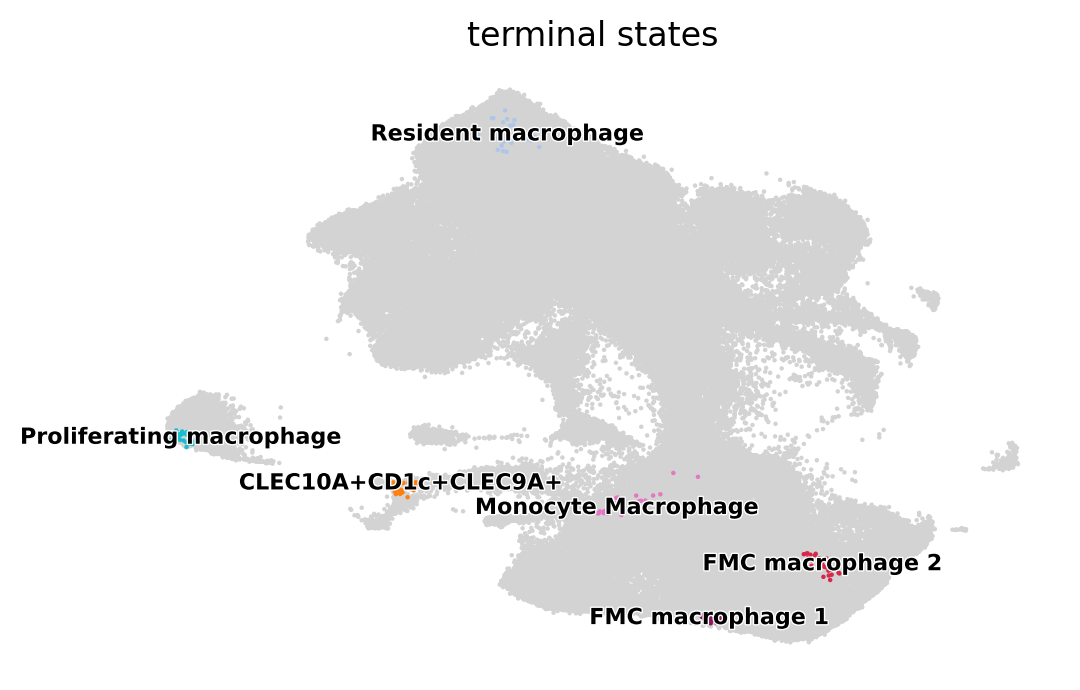

In [10]:
cr.pl.terminal_states(adata, discrete=True,legend_fontsize=8)

Accessing `adata.obsp['T_bwd']`


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-541791c2268e>:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key='Defined_type',n_jobs=4,n_states=1)
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/161178 [00:00<?, ?cell/s]

Setting `softmax_scale=5.1038`


  0%|          | 0/161178 [00:00<?, ?cell/s]

    Finish (0:05:47)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:03)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:02:26)
For 1 macrostate, stationary distribution is computed
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


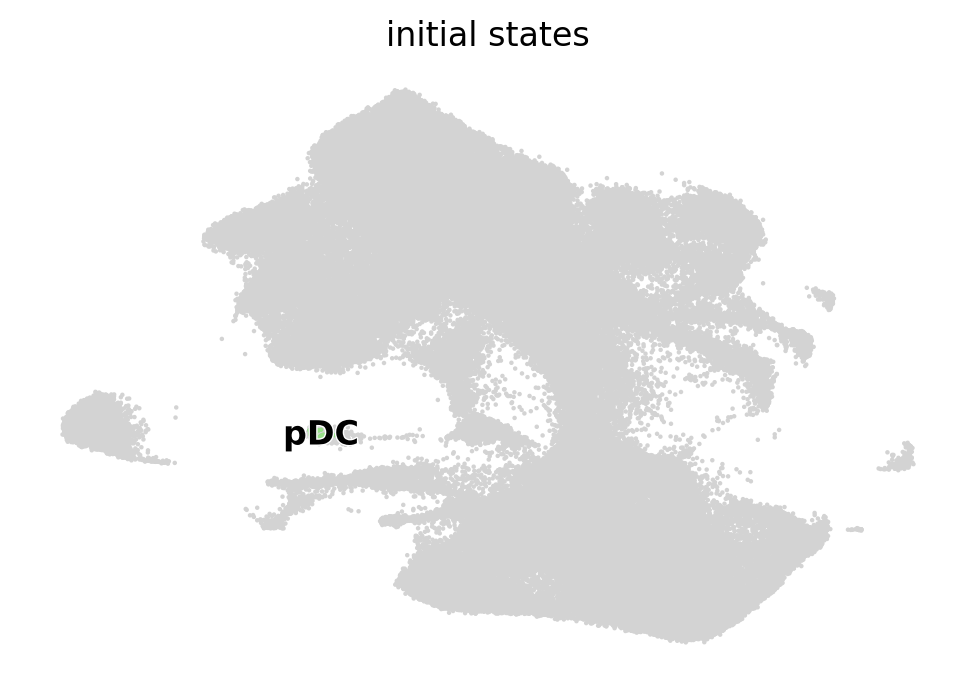

In [11]:
cr.tl.initial_states(adata, cluster_key='Defined_type',n_jobs=4,n_states=1)
cr.pl.initial_states(adata, discrete=True)

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-4ec1421c6596>:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata)


Computing absorption probabilities


  0%|          | 0/6 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:52)


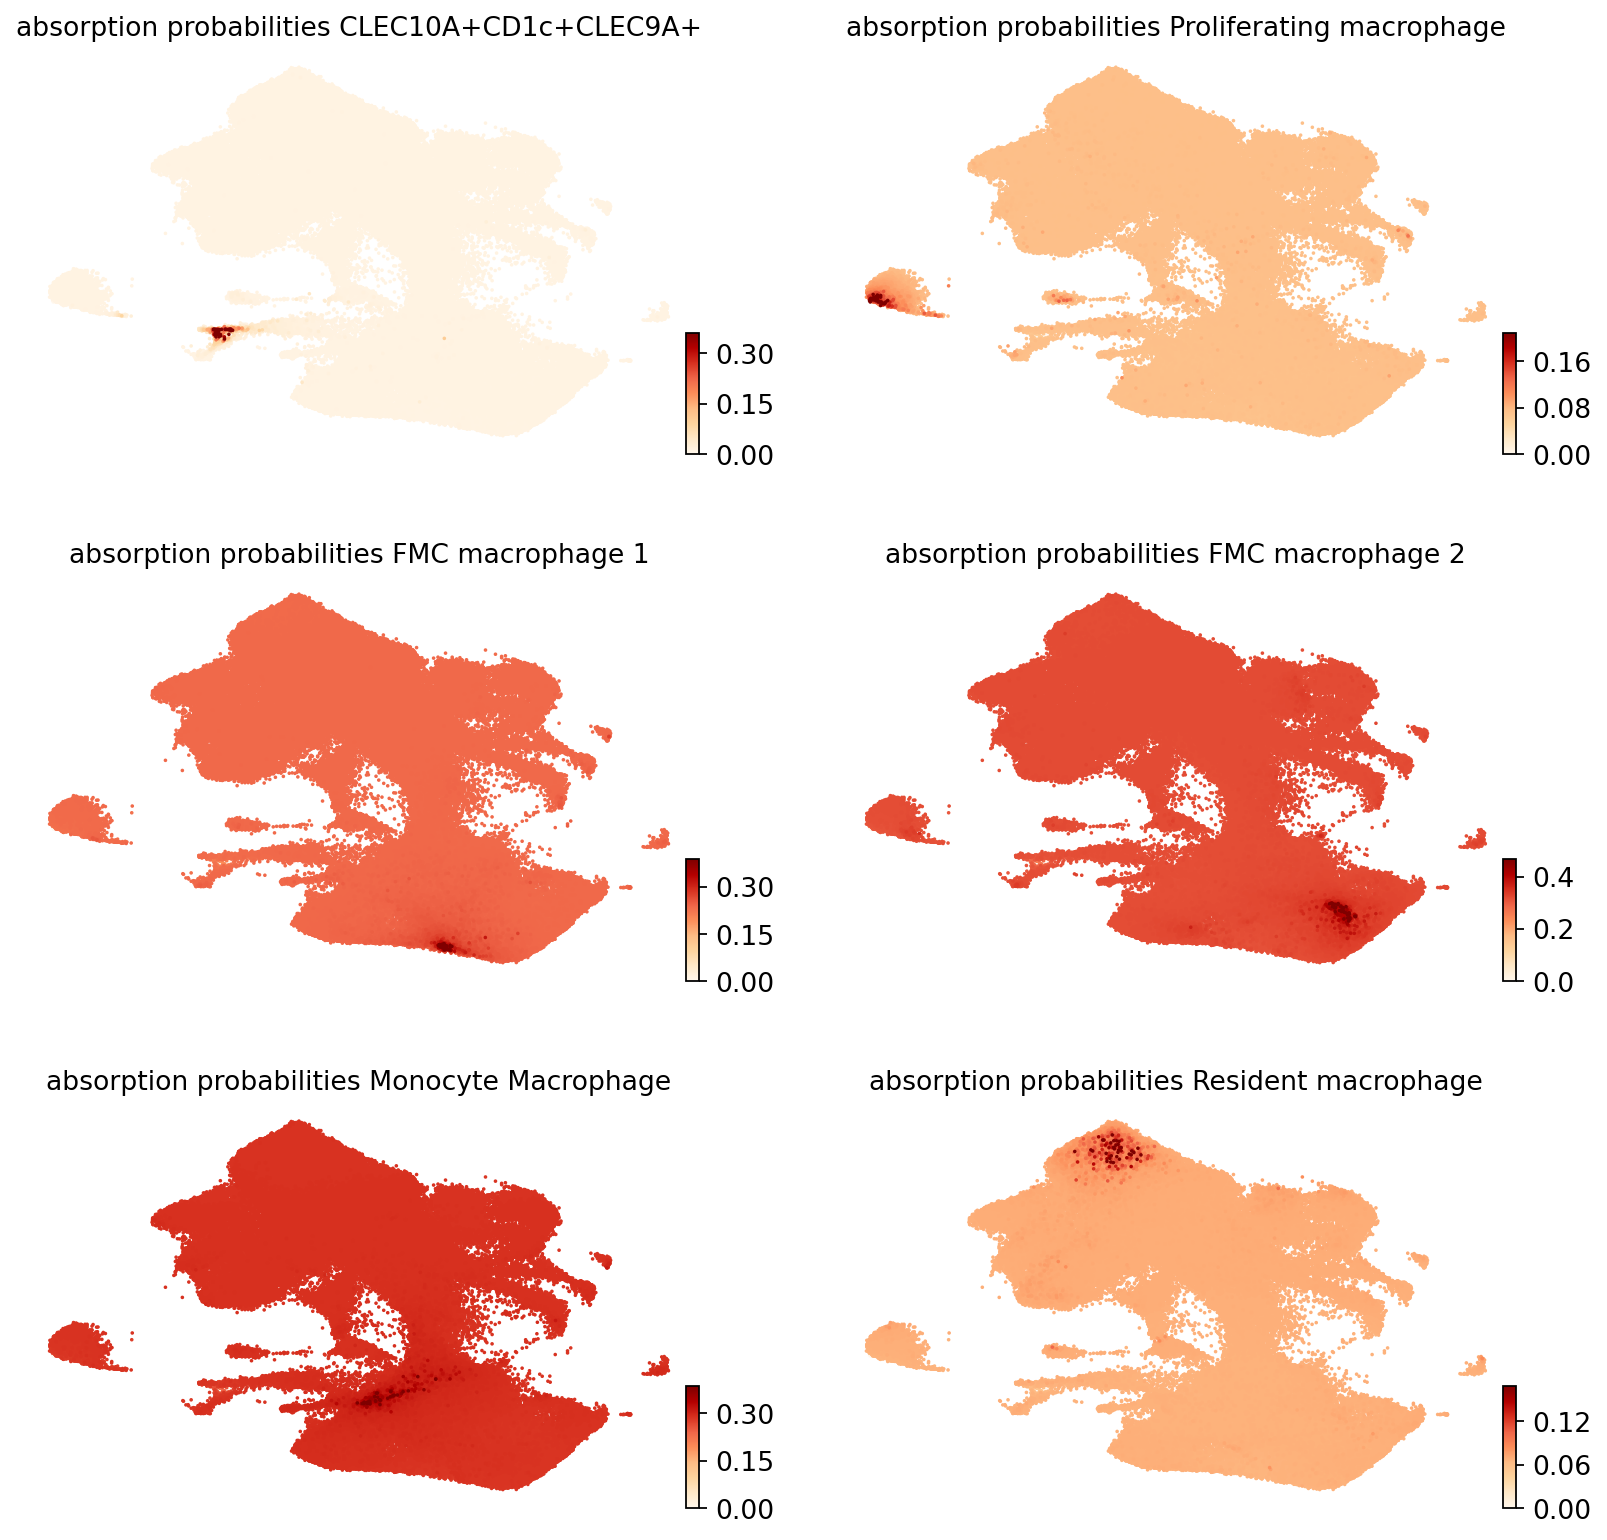

In [12]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False,ncols=2,cmap='OrRd')

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


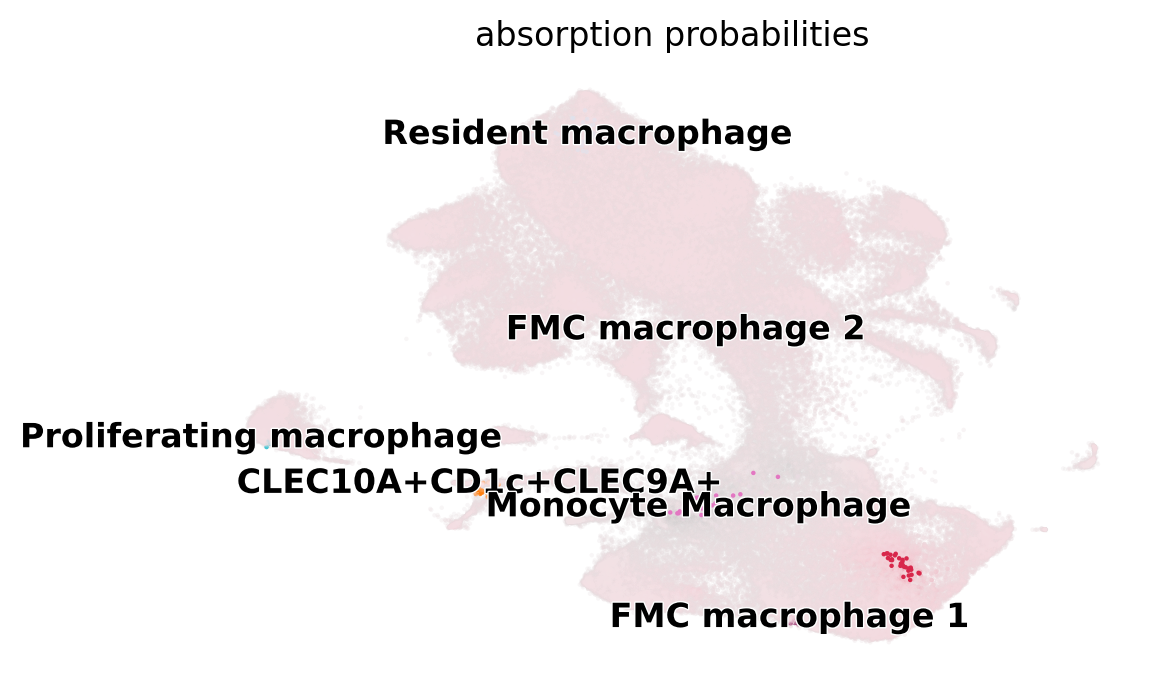

In [13]:
cr.pl.lineages(adata, discrete=True)

In [14]:
adata

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AnnData object with n_obs × n_vars = 161178 × 12443
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'leiden', 'Cell_Type', 'leiden_resol_3', 'Defined_type', 'Monocyte_factors', 'CD14_binary', 'FCGR3A_binary', 'CCR2_binary', 'CX3CR1_binary', 'Tcell_factors', 'CD8A_binary', 'CD3E_binary', 'velocity_self_transition', 'terminal_states', 'terminal_states_probs', 'initial_states', 'initial_states_probs', 'clusters_gradients'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_coun

In [15]:
scv.tl.velocity_pseudotime(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


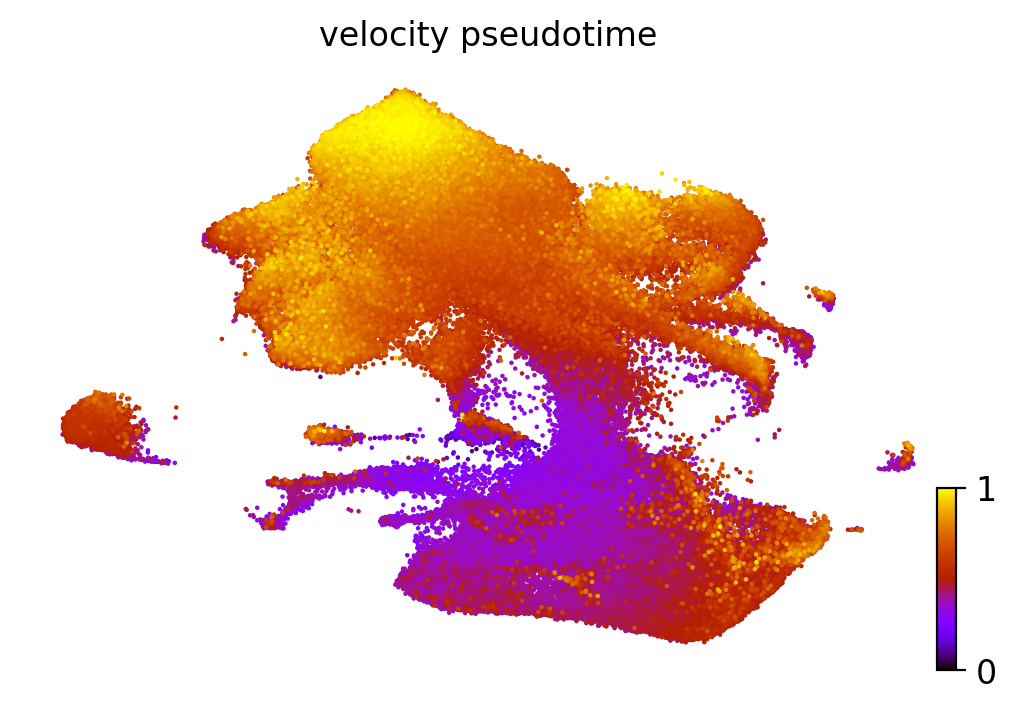

In [16]:
scv.pl.scatter(adata, color='velocity_pseudotime', color_map='gnuplot')

In [17]:
#scv.tl.recover_latent_time( adata, root_key="initial_states_probs", end_key="terminal_states_probs")

In [18]:
scv.tl.paga(
    adata,
    groups="Defined_type",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior='velocity_pseudotime',
)

running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:03:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


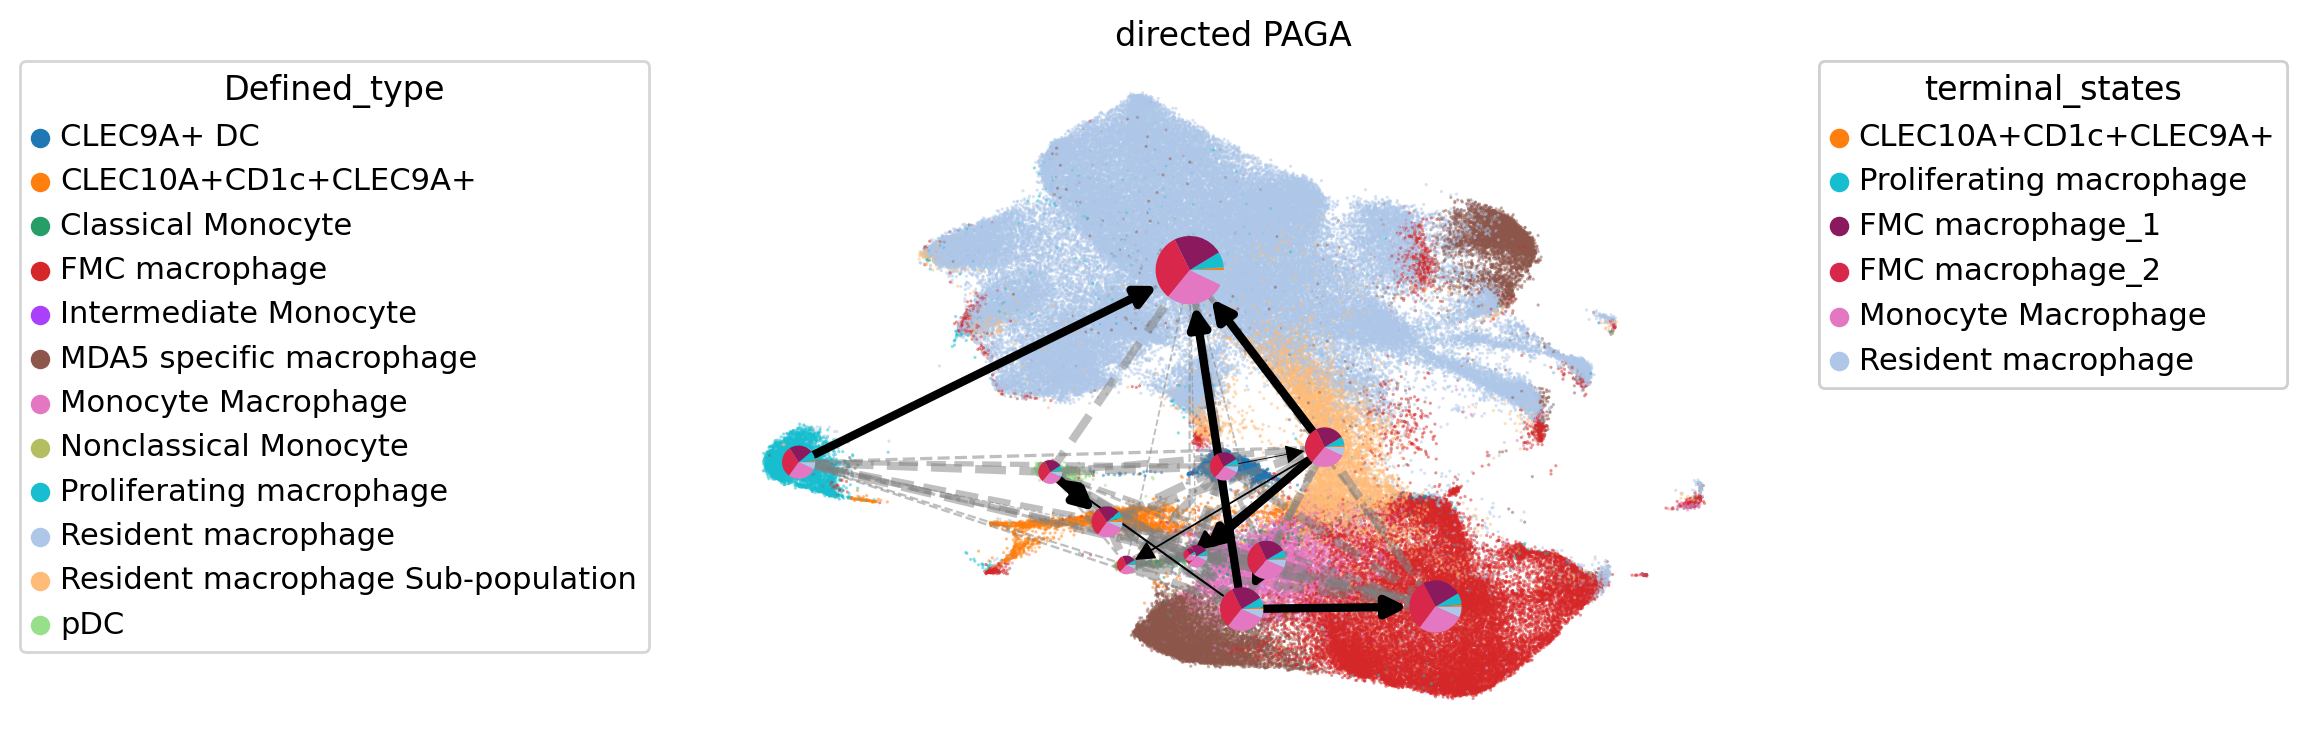

In [19]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="Defined_type",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=1,
    edge_width_scale=1,
    max_edge_width=3,
    title="directed PAGA",
)

In [20]:
adata.obs["Defined_type"].unique().tolist()

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['MDA5 specific macrophage',
 'Resident macrophage',
 'FMC macrophage',
 'CLEC10A+CD1c+CLEC9A+',
 'Proliferating macrophage',
 'pDC',
 'Monocyte Macrophage',
 'CLEC9A+ DC',
 'Intermediate Monocyte',
 'Resident macrophage Sub-population',
 'Classical Monocyte',
 'Nonclassical Monocyte']

In [22]:
sub = adata[adata.obs["Defined_type"].isin(['MDA5 specific macrophage',
 'Resident macrophage',
 'FMC macrophage',
 'Proliferating macrophage',
 'Monocyte Macrophage',
 'Intermediate Monocyte',
 'Resident macrophage Sub-population',
 'Classical Monocyte',
 'Nonclassical Monocyte'])].copy()

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
scv.tl.paga(
    sub,
    groups="Defined_type",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior='velocity_pseudotime',
)

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:02:45) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


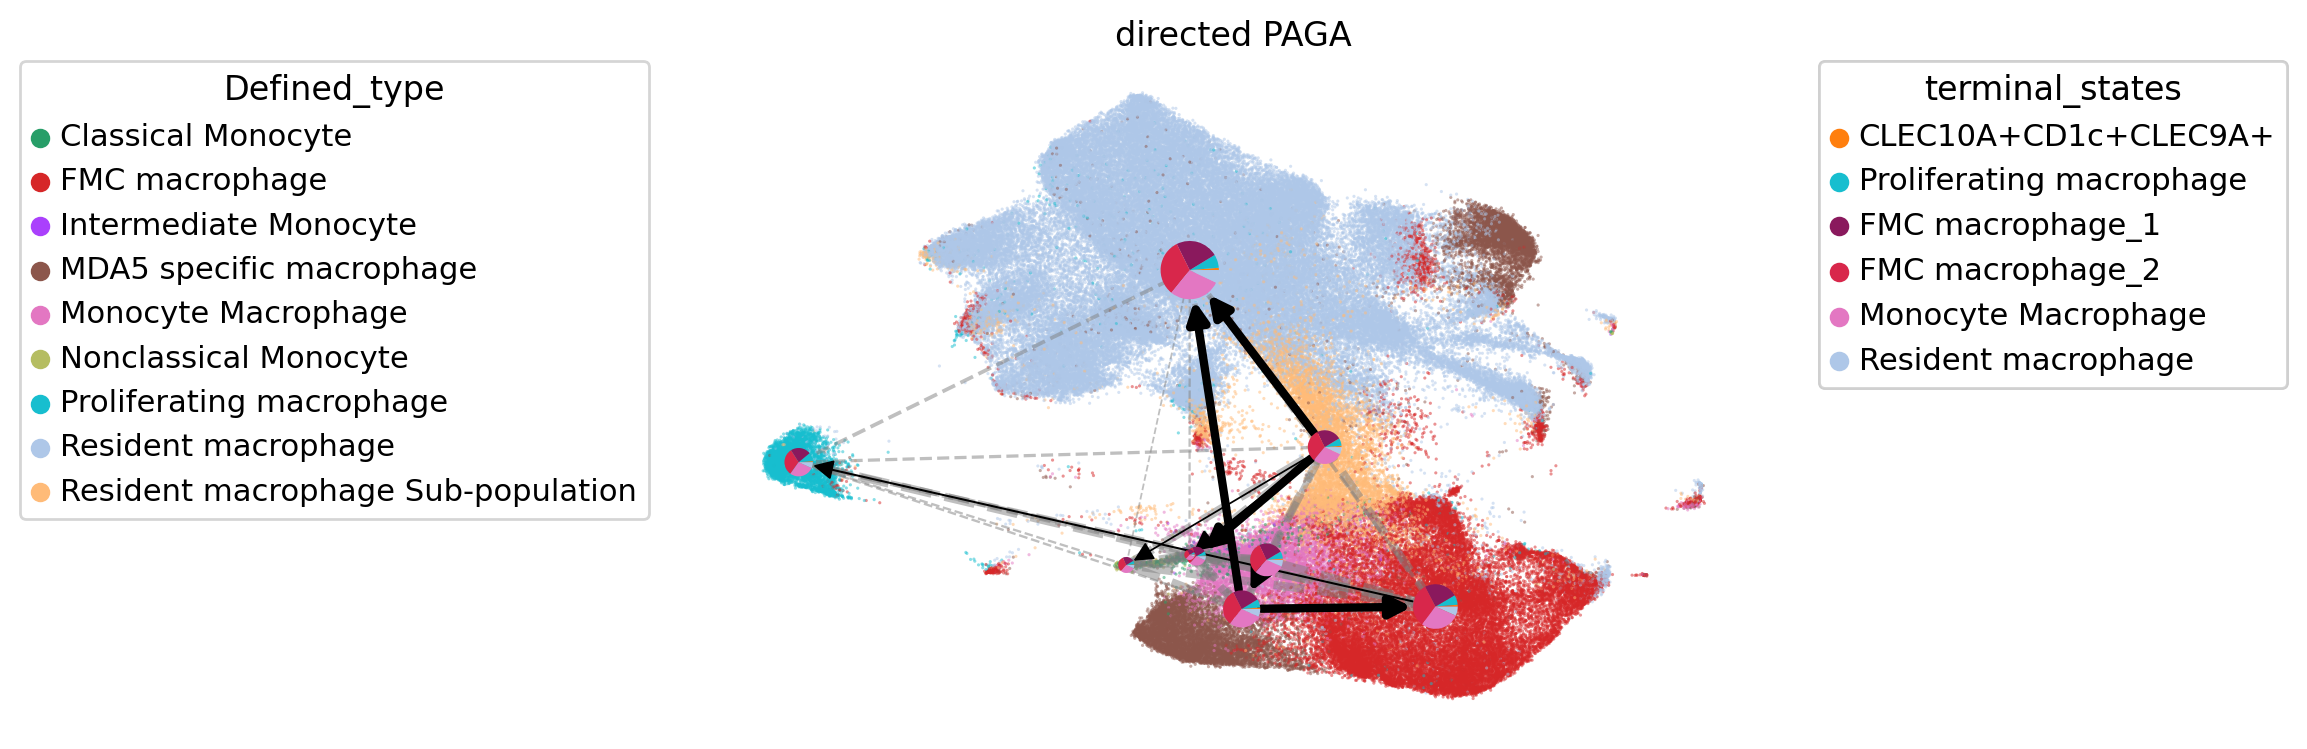

In [24]:
cr.pl.cluster_fates(
    sub,
    mode="paga_pie",
    cluster_key="Defined_type",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=1,
    edge_width_scale=1,
    max_edge_width=3,
    title="directed PAGA",
)

In [ ]:
scv.tl.paga(
    adata,
    groups="leiden",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)

In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="leiden",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=1,
    edge_width_scale=1,
    max_edge_width=3,
    title="directed PAGA",
)

In [ ]:
cr.tl.lineage_drivers(adata)

In [ ]:
Terminals = adata.obs['terminal_states'].unique().tolist()

In [ ]:
Terminals.remove(np.NaN)

In [ ]:
adata.varm['terminal_lineage_drivers']

In [ ]:
adata

In [ ]:
#adata.write(out_path+'/human_subset_0607.h5ad')

In [ ]:
for te in Terminals:
    cr.pl.lineage_drivers(adata, lineage=te, n_genes=6,ncols=2)

In [ ]:
Terminals = adata.obs['terminal_states'].unique().tolist()
Terminals.remove(np.nan)
top_drivers = {}
for te in Terminals:
    top_drivers[te]=adata.varm['terminal_lineage_drivers'][te+"_corr"].sort_values(ascending=False).index[:200]
top_200 = pd.DataFrame(top_drivers)
top_200.to_csv(out_path+'/Macrophage_remove_PBMC_DC_drivers.csv')

In [ ]:
Terminals = adata.obs['terminal_states'].unique().tolist()
Terminals.remove(np.nan)
top3_drivers = []
for te in Terminals:
    top3_drivers.extend(adata.varm['terminal_lineage_drivers'][te+"_corr"].sort_values(ascending=False).index[:1])


In [ ]:
top3_drivers

Computing trends using `1` core(s)


  0%|          | 0/6 [00:00<?, ?gene/s]

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

    Finish (0:01:31)
Plotting trends


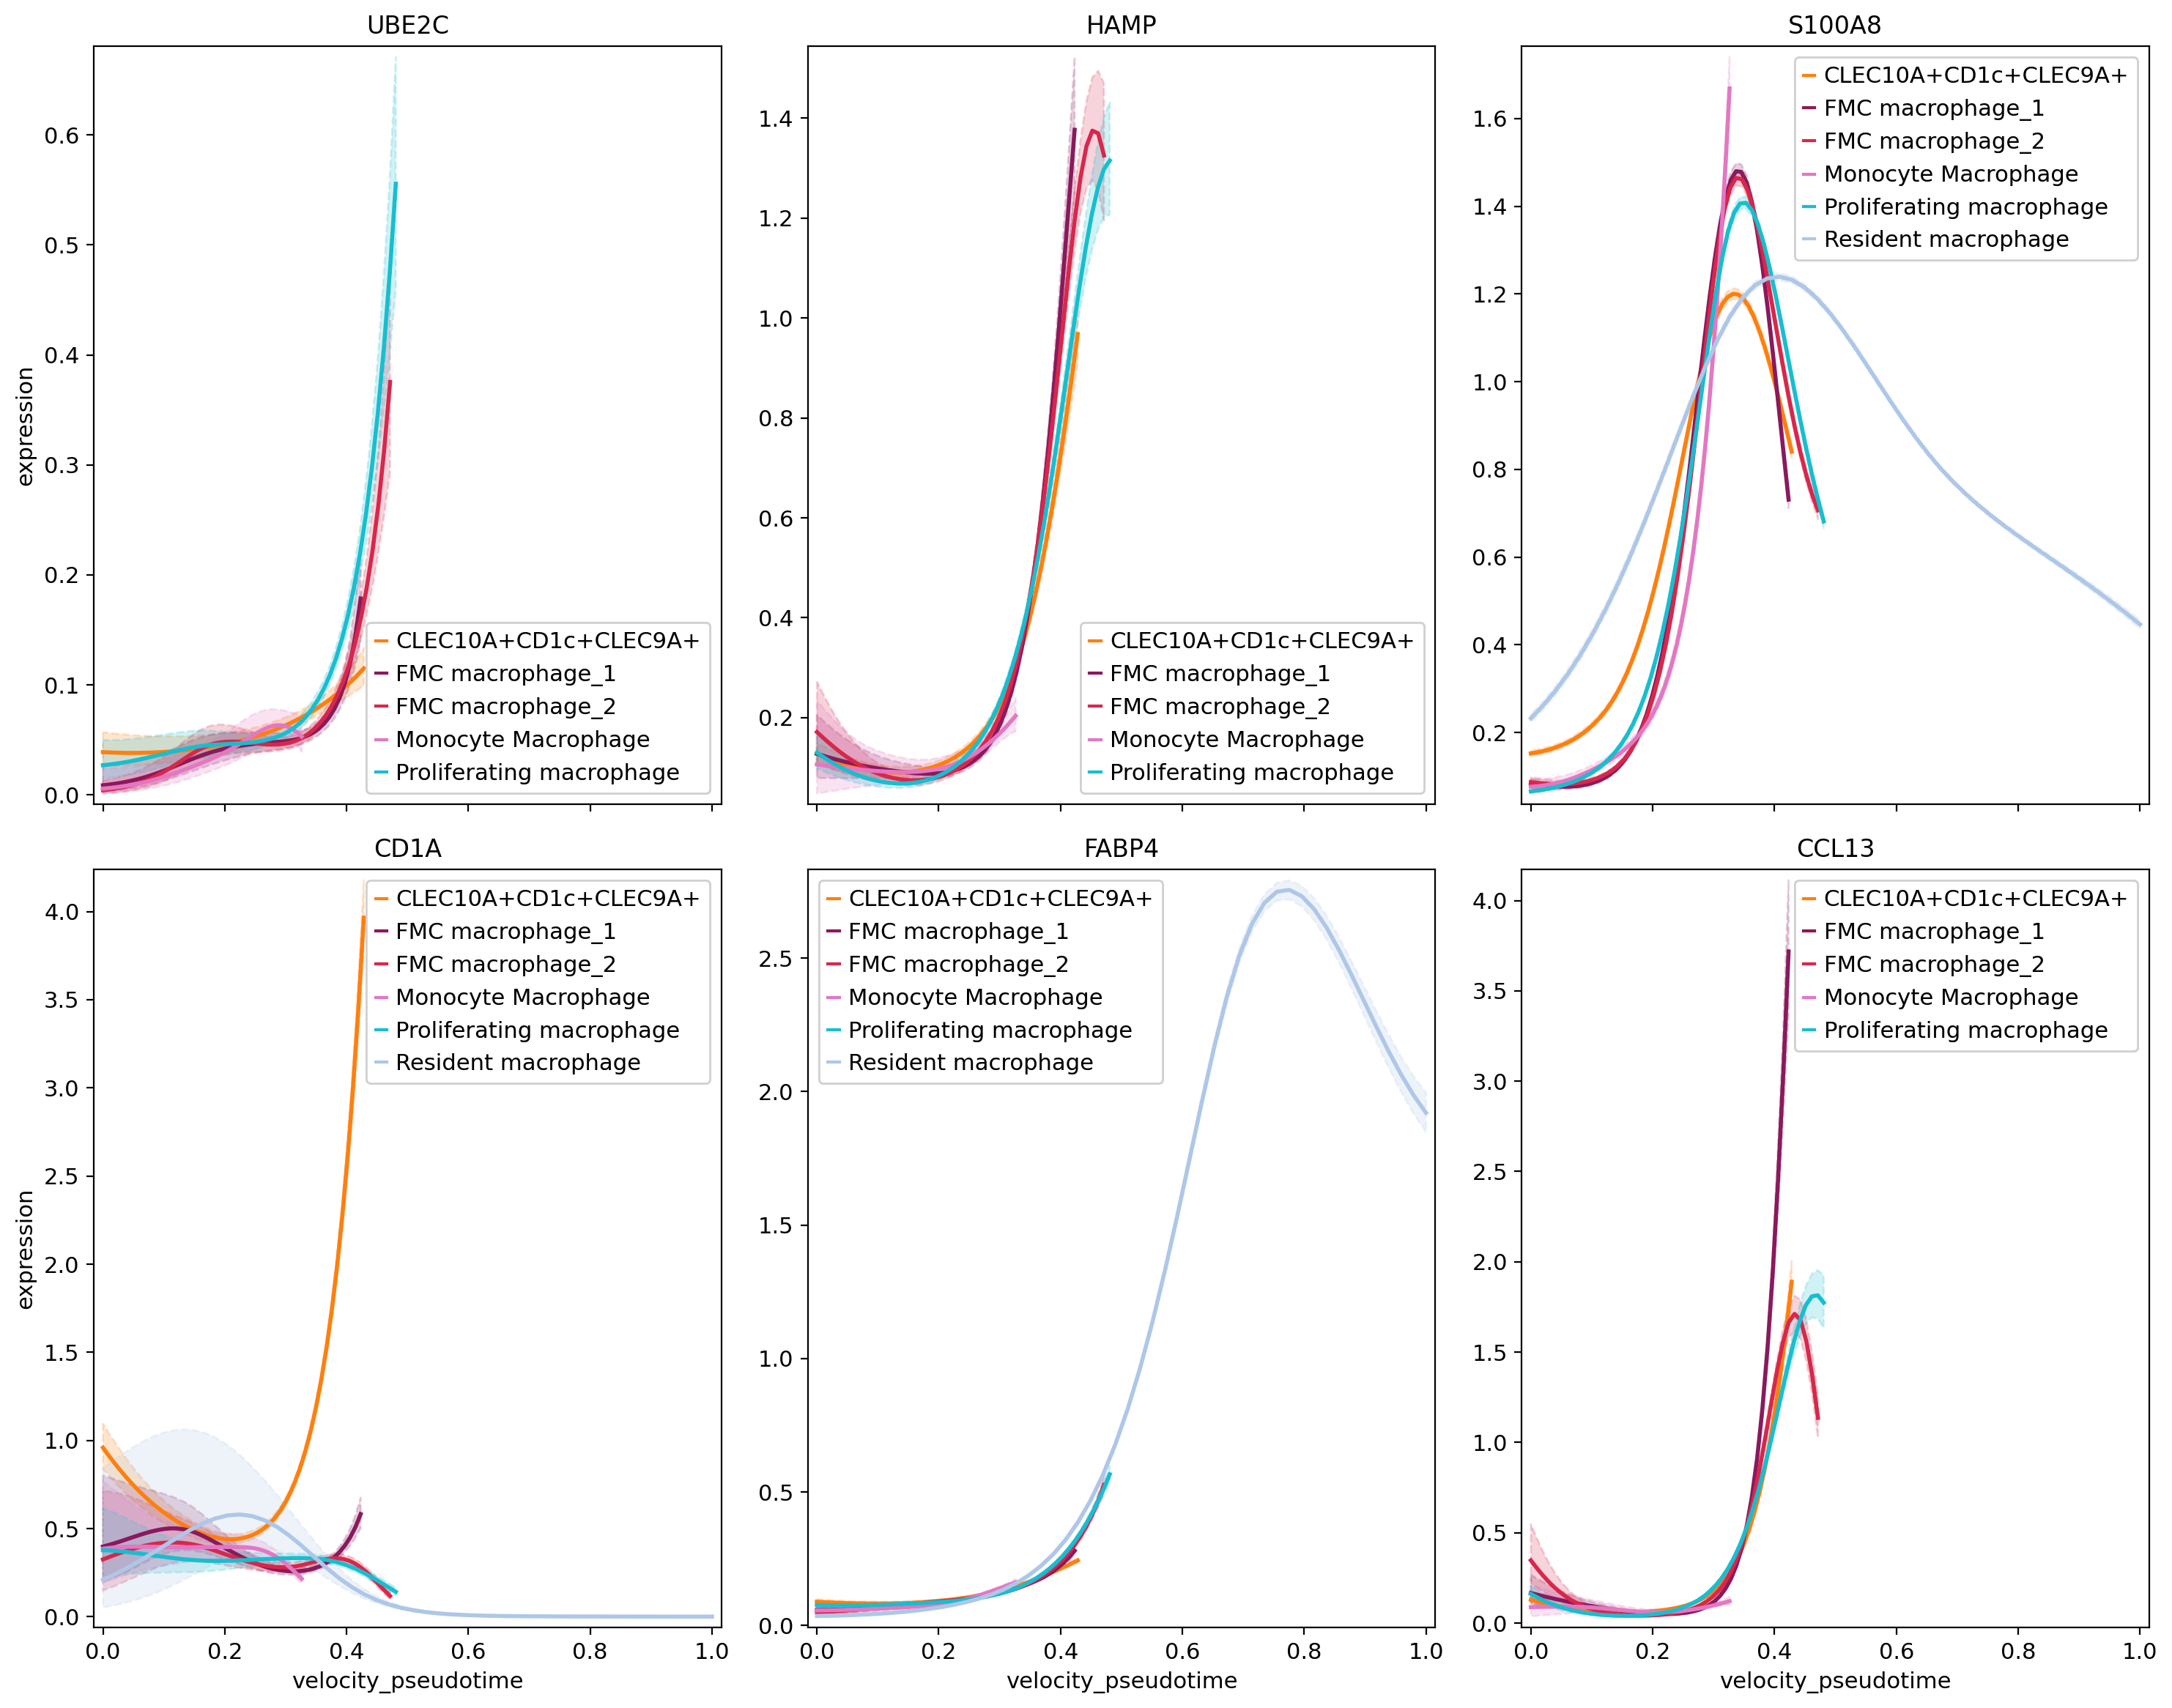

In [77]:
model = cr.ul.models.GAM(adata)
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="X",
    genes=top3_drivers,
    ncols=3,
    time_key="velocity_pseudotime",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 12),
    n_test_points=50,
)

In [78]:

from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/human_subset_remove_PBMC.h5ad', out_path+'/human_subset_remove_PBMC.bcs',
                        input_format="h5ad", graph_based="leiden")


/user/ifrec/liuyuchen/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert predicted_doublet to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert Defined_type to numeric, treating as categorical
Cannot convert Monocyte_factors to numeric, treating as categorical
Cannot convert CD14_binary to numeric, treating as categorical
Cannot convert FCGR3A_binary to numeric, treating as categorical
Cannot convert CCR2_binary to numeric, treating as categorical
Cannot convert CX3CR1_binary to numeric, treating as categorical
Cannot convert Tcell_factors to numeric, treating as categorical
Cannot convert CD8A_binary to numeric, treating as categorical
Cannot convert CD3E_binary to numeric, treating as categorical
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/659c5bcfe32b4afaa9f0ea246f2adcd8.json
Writing main/metad

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human//human_subset_remove_PBMC.bcs'